<a href="https://colab.research.google.com/github/patemotter/demystifying-ai/blob/main/notebooks/session_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align="center">

#  

# Demystifying AI - Session 3
## Model Architectures: Different Tools for Different Jobs

### Pate Motter, PhD

AI Performance Engineer @ Google

[LinkedIn](https://www.linkedin.com/in/patemotter/) | [GitHub](https://github.com/patemotter)

</div>

## About This Notebook

Welcome back to our "Demystifying AI" series! In our previous sessions, we've explored the fundamental building blocks of AI, like neurons and how AI learns. Today, we're diving into how these basic components are organized into different types of AI models, also known as **architectures**.

Think of it like building with LEGOs: you have individual bricks (neurons), but you can create vastly different structures – a car, a house, a spaceship – depending on how you assemble them. Similarly, different AI problems call for different ways of organizing neurons.

In this session, we'll explore three major model architectures and understand why they are well-suited (or were traditionally used) for specific kinds of tasks. We'll also peek at the math that makes them work!

**Let's get started!**

---

## Section 1: Feedforward Neural Networks (MLPs) - The General-Purpose Tool

### What are Feedforward Neural Networks?

These are the most fundamental type of neural networks, and we've touched upon their basics earlier.  Information flows in one direction – from the input, through one or more hidden layers, to the output. There are no loops or cycles. You might also hear them called Multi-Layer Perceptrons (MLPs).

MLPs are incredibly versatile and can be applied to a broad range of tasks, especially when the data isn't inherently sequential or spatial. Imagine tasks like:
- Classifying images (is it a cat or a dog?)
- Predicting house prices based on features
- Recognizing handwritten digits

### Interactive Neuron Visualization

Let's revisit our single neuron from Session 1 This will help us see firsthand how inputs, weights, bias, and the activation function shape the neuron's output.

In [11]:
# @title Interactive Neuron Visualization
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, ArrowStyle
from matplotlib.colors import to_rgba

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def neuron_output(inputs, weights, bias, activation_function_name):
    weighted_sum = np.sum(inputs * weights) + bias
    if activation_function_name == 'Sigmoid':
        output = sigmoid(weighted_sum)
    elif activation_function_name == 'ReLU':
        output = relu(weighted_sum)
    else:  # Linear
        output = weighted_sum
    return output

def plot_activation_function(activation_function_name, output_area, weighted_sum, output_val):
    with output_area:
        clear_output(wait=True)
        x_vals = np.linspace(-10, 10, 200)
        if activation_function_name == 'Sigmoid':
            y_vals = sigmoid(x_vals)
        elif activation_function_name == 'ReLU':
            y_vals = relu(x_vals)
        else:  # Linear
            y_vals = x_vals

        fig, ax = plt.subplots(figsize=(7, 5))
        ax.plot(x_vals, y_vals, label=activation_function_name, linewidth=2.5)
        ax.scatter(weighted_sum, output_val, color='red', s=80, zorder=5, label='Neuron Output')
        ax.set_title(f'{activation_function_name} Activation Function', fontsize=14)
        ax.set_xlabel('Weighted Sum (Input to Activation)', fontsize=12)
        ax.set_ylabel('Output', fontsize=12)
        ax.grid(True, linestyle='--', alpha=0.6)
        ax.legend(fontsize=10, loc='upper left')
        ax.axvline(0, color='black', linewidth=1)
        ax.axhline(0, color='black', linewidth=1)
        ax.set_xlim([-10, 10])
        ax.set_ylim([min(y_vals) - 0.2, max(y_vals) + 0.2])

        if activation_function_name == 'ReLU':
            ax.fill_between(x_vals, y_vals, where=(x_vals >= 0), color='lightgreen', alpha=0.3, label='Active Region')
            ax.legend(fontsize=10, loc='upper left')

        if activation_function_name == 'ReLU':
            ax.plot([0, weighted_sum], [0, output_val], color='gray', linestyle=':', linewidth=1.5)
        elif activation_function_name == 'Sigmoid' or activation_function_name == 'Linear':
            ax.plot([0, weighted_sum], [sigmoid(0) if activation_function_name == 'Sigmoid' else 0, output_val], color='gray', linestyle=':', linewidth=1.5)

        plt.show(block=False)

def draw_neuron_diagram(input1, input2, weight1, weight2, bias, weighted_sum, output_val, activation_function_name, diagram_area):
    with diagram_area:
        clear_output(wait=True)
        fig, ax = plt.subplots(figsize=(10, 5))
        ax.set_aspect('equal')
        ax.axis('off')

        neuron_color = 'skyblue'
        input_color = 'lightgreen'
        weight_color = 'coral'
        bias_color = 'gold'
        output_color = 'mediumseagreen'
        text_color = 'black'

        neuron_center_x = 0.4
        neuron_center_y = 0.5
        neuron_radius = 0.15
        neuron_circle = Circle((neuron_center_x, neuron_center_y), neuron_radius, facecolor=neuron_color, edgecolor='black', linewidth=2, alpha=0.8)
        ax.add_patch(neuron_circle)

        input_positions = [neuron_center_y + neuron_radius * 0.6, neuron_center_y - neuron_radius * 0.6]
        for i, (inp_val, inp_pos) in enumerate(zip([input1, input2], input_positions)):
            ax.annotate(f'Input {i+1}: {inp_val:.2f}', xy=(neuron_center_x - neuron_radius, inp_pos),
                        xytext=(neuron_center_x - neuron_radius - 0.25, inp_pos),
                        arrowprops=dict(arrowstyle="->", color=input_color, linewidth=2),
                        ha='right', va='center', fontsize=10, color=text_color)

        weight_positions = [neuron_center_y + neuron_radius * 0.6, neuron_center_y - neuron_radius * 0.6]
        for i, (w_val, w_pos) in enumerate(zip([weight1, weight2], weight_positions)):
            arrow_x = neuron_center_x - neuron_radius - 0.25
            mid_x = (arrow_x + (neuron_center_x - neuron_radius)) / 2
            mid_y = w_pos
            ax.text(mid_x, mid_y, f'W{i+1}: {w_val:.2f}', ha='center', va='center',
                    fontsize=10, color=weight_color, bbox=dict(facecolor='white', alpha=0.6, edgecolor='none', boxstyle='round,pad=0.1'))

        ax.annotate(f'Bias: {bias:.2f}', xy=(neuron_center_x, neuron_center_y - neuron_radius),
                    xytext=(neuron_center_x, neuron_center_y - neuron_radius - 0.2),
                    arrowprops=dict(arrowstyle="->", color=bias_color, linewidth=2),
                    ha='center', va='top', fontsize=10, color=text_color)

        # --- Output Section (Improved) ---
        output_x = neuron_center_x + neuron_radius + 0.1  # Start of output section
        output_text_x = output_x + 0.25    # X-coordinate for output text

        # Weighted Sum and Activation - Clearer labels and formatting
        ax.text(output_x, neuron_center_y + 0.1, f'Weighted Sum: {weighted_sum:.2f}',
                ha='left', va='bottom', fontsize=11, color=text_color)
        ax.text(output_x, neuron_center_y - 0.1, f'Activation: {activation_function_name}',
                ha='left', va='top', fontsize=11, color=text_color)


        # Output Text -  Bolder and more prominent, positioned *after* the arrow
        output_text = ax.text(output_text_x + neuron_radius - 0.35, neuron_center_y , f'Output: {output_val:.4f}',
                ha='left', va='center', fontsize=12, color='white', fontweight='bold',  # Left-aligned with other text
                bbox=dict(facecolor=output_color, alpha=0.9, edgecolor='none', boxstyle='round,pad=0.3'))

        # Arrow from neuron to output - CORRECTED DIRECTION
        ax.annotate("", xy=(output_x, neuron_center_y), xytext=(neuron_center_x + neuron_radius, neuron_center_y),
                    arrowprops=dict(arrowstyle="->", color=output_color, linewidth=5))


        ax.set_title('Interactive Neuron Diagram', fontsize=16)
        ax.set_xlim([0, 1])
        ax.set_ylim([0, 1])
        plt.show(block=False)

def interactive_neuron_viz(input1, input2, weight1, weight2, bias, activation_function, output_area, diagram_area):
    inputs = np.array([input1, input2])
    weights = np.array([weight1, weight2])
    weighted_sum = np.sum(inputs * weights) + bias
    output_val = neuron_output(inputs, weights, bias, activation_function)
    output_label.value = f"Neuron Output: <span style='color:green; font-weight: bold;'>{output_val:.4f}</span>"
    plot_activation_function(activation_function, output_area, weighted_sum, output_val)
    draw_neuron_diagram(input1, input2, weight1, weight2, bias, weighted_sum, output_val, activation_function, diagram_area)

# --- Widgets ---
style = {'description_width': 'initial'}
input1_slider = widgets.FloatSlider(value=1.0, min=-5.0, max=5.0, step=0.1, description='Input 1:', style=style)
input2_slider = widgets.FloatSlider(value=-0.5, min=-5.0, max=5.0, step=0.1, description='Input 2:', style=style)
weight1_slider = widgets.FloatSlider(value=0.5, min=-2.0, max=2.0, step=0.1, description='Weight 1:', style=style)
weight2_slider = widgets.FloatSlider(value=-0.3, min=-2.0, max=2.0, step=0.1, description='Weight 2:', style=style)
bias_slider = widgets.FloatSlider(value=0.1, min=-2.0, max=2.0, step=0.1, description='Bias:', style=style)
activation_dropdown = widgets.Dropdown(options=['Linear', 'Sigmoid', 'ReLU'], value='Sigmoid', description='Activation Function:', style=style)

output_label = widgets.HTML(value=f"Neuron Output: <span style='color:green; font-weight: bold;'>0.0000</span>")
plot_output_area = widgets.Output()
diagram_output_area = widgets.Output()

# --- Interactive Function and Layout ---
interactive_output = widgets.interactive(
    interactive_neuron_viz,
    input1=input1_slider,
    input2=input2_slider,
    weight1=weight1_slider,
    weight2=weight2_slider,
    bias=bias_slider,
    activation_function=activation_dropdown,
    output_area=widgets.fixed(plot_output_area),
    diagram_area=widgets.fixed(diagram_output_area)
)

# --- Simplified Layout ---
input_widgets = widgets.VBox([input1_slider, input2_slider])
weight_widgets = widgets.VBox([weight1_slider, weight2_slider])
input_weight_group = widgets.HBox([input_widgets, weight_widgets])
controls_group = widgets.VBox([input_weight_group, bias_slider, activation_dropdown])

output_plot_box = widgets.HBox([diagram_output_area, plot_output_area])
final_output_box = widgets.VBox([controls_group, output_label, output_plot_box])

title = HTML("<h2 style='color:white; text-align:center;'>Interactive Neuron Simulator</h2>")
display(title, final_output_box)

interactive_neuron_viz(input1_slider.value, input2_slider.value, weight1_slider.value, weight2_slider.value, bias_slider.value, activation_dropdown.value, plot_output_area, diagram_output_area)

**Experiment:**
Play with the sliders and the activation function dropdown. Observe how changing these parameters affects the neuron's output, displayed in blue above the activation function plot.  Notice how the activation function shapes the range of possible outputs. This simple neuron operation is the bedrock of all the more complex architectures we'll explore today!

### A Peek at the Math: Matrix Multiplication in Layers

When we scale up from a single neuron to layers of neurons, the calculations can be expressed very efficiently using **linear algebra**, specifically **matrix multiplication**. This is not just about making things look compact; it's crucial for efficient computation, especially in deep learning.

Imagine a layer with multiple neurons. Each neuron has its own set of weights for all the inputs it receives. We can neatly organize these weights into a **matrix**. Similarly, the inputs to a layer can be arranged as a **vector**. The magic is that calculating the outputs of *all* neurons in the layer can then be achieved with a single matrix multiplication!

In [2]:
# @title Matrix Multiplication code
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib.patches as patches

def create_matrix_multiplication_animation(A, B):
    """
    Create an interactive animation showing matrix multiplication of A × B = C.
    With matrices oriented correctly with [0,0] at the top left.
    """
    # Calculate the result matrix
    C = np.matmul(A, B)

    # Setup the figure with a pleasing style
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, ax = plt.subplots(figsize=(12, 8))
    fig.patch.set_facecolor('#f0f0f5')
    ax.set_facecolor('#f8f8ff')

    fig.suptitle('Matrix Multiplication: A × B = C', fontsize=22, fontweight='bold', color='#333399')

    # Nice colors for visualization
    highlight_color = '#ffcc00'  # Bright yellow
    result_color = '#66ff66'     # Bright green
    row_color = '#ffb366'        # Light orange
    col_color = '#99ccff'        # Light blue
    mult_color = '#ff9999'       # Light red
    edge_color = '#333333'       # Dark gray

    # Position matrices on the canvas
    a_pos_x, a_pos_y = 1, 1
    b_pos_x, b_pos_y = 5.5, 1
    c_pos_x, c_pos_y = 10, 1

    # Position for the calculation display
    calc_x, calc_y = 5.5, 5

    def draw_matrix(matrix, pos_x, pos_y, name, cell_width=0.8, cell_height=0.8,
                   highlight_row=None, highlight_col=None, highlight_cell=None, result_cell=None,
                   mask=None):
        """Draw a matrix with optional highlighting and masking."""
        rows, cols = matrix.shape

        # Draw matrix label
        ax.text(pos_x + cols*cell_width/2, pos_y - 0.7, name,
                ha='center', va='center', fontsize=18, fontweight='bold', color='#333399')

        # Draw the matrix outline
        rect = plt.Rectangle((pos_x - 0.1, pos_y - 0.1),
                            cols*cell_width + 0.2, rows*cell_height + 0.2,
                            edgecolor=edge_color, facecolor='none', linewidth=2, alpha=0.8)
        ax.add_patch(rect)

        # Draw the matrix cells - with [0,0] at the top left
        for i in range(rows):
            for j in range(cols):
                # Determine cell color based on highlighting
                if highlight_row is not None and i == highlight_row:
                    color = row_color
                elif highlight_col is not None and j == highlight_col:
                    color = col_color
                elif highlight_cell is not None and (i, j) == highlight_cell:
                    color = mult_color
                elif result_cell is not None and (i, j) == result_cell:
                    color = result_color
                else:
                    color = 'white'

                # Create a cell with rounded corners - FLIPPED VERTICALLY to put [0,0] at the top left
                # The key is to invert the y-coordinate
                y_position = pos_y + (rows - 1 - i) * cell_height  # This flips the matrix vertically

                rect = plt.Rectangle((pos_x + j*cell_width, y_position),
                                    cell_width, cell_height,
                                    edgecolor=edge_color, facecolor=color, alpha=0.8,
                                    linewidth=1.5, zorder=1)
                ax.add_patch(rect)

                # Add the cell value - also with flipped y coordinate
                if mask is not None and not mask[i, j]:
                    display_val = "?"
                else:
                    display_val = f"{matrix[i, j]}"

                ax.text(pos_x + j*cell_width + cell_width/2,
                       y_position + cell_height/2,
                       display_val,
                       ha='center', va='center', fontsize=14, fontweight='bold',
                       color='#333333', zorder=2)

    # Function to draw connecting arrow
    def draw_connection(start_x, start_y, end_x, end_y, color='#ff6600', linewidth=2.5, alpha=0.7):
        """Draw a curved arrow connecting two points."""
        arrow = patches.FancyArrowPatch(
            (start_x, start_y), (end_x, end_y),
            connectionstyle="arc3,rad=0.2",
            arrowstyle="Simple,head_width=10,head_length=10,tail_width=1.5",
            color=color, linewidth=linewidth, alpha=alpha, zorder=3
        )
        ax.add_patch(arrow)

    # Function to get cell center position
    def get_cell_center(matrix_x, matrix_y, i, j, cell_width=0.8, cell_height=0.8):
        """Calculate the center coordinates of a cell. [0,0] is at the top left."""
        # Flip the y-coordinate to match the matrix display
        rows = A.shape[0] if i < A.shape[0] else B.shape[0]  # Get appropriate number of rows
        y_position = matrix_y + (rows - 1 - i) * cell_height  # This flips the matrix vertically

        return (matrix_x + j*cell_width + cell_width/2,
                y_position + cell_height/2)

    def draw_operation(i, j, step):
        """
        Draw the current step of the matrix multiplication.
        i, j: indices of the cell being calculated in the result matrix C
        step: current step in the dot product calculation (or -1 for showing final result)
             (-2 for initial display with no calculations)
        """
        ax.clear()
        ax.set_xlim(0, 14)
        ax.set_ylim(0, 7)
        ax.axis('off')

        # Handle initial frame showing just the matrices
        if i == -1 and j == -1 and step == -2:
            # Just draw the basic matrices with no highlighting
            draw_matrix(A, a_pos_x, a_pos_y, 'Matrix A')
            draw_matrix(B, b_pos_x, b_pos_y, 'Matrix B')

            # Draw an empty C matrix with all cells masked
            empty_mask = np.zeros_like(C, dtype=bool)
            draw_matrix(C, c_pos_x, c_pos_y, 'Matrix C', mask=empty_mask)

            # Add a title for the first slide
            ax.text(calc_x, calc_y, "Matrix Multiplication: A × B = C",
                    fontsize=18, fontweight='bold', color='#333399')
            ax.text(calc_x, calc_y - 0.7, "We'll calculate each element of C one by one",
                    fontsize=16, color='#333333')

            return

        # Number of columns in A / rows in B (dot product length)
        k_max = A.shape[1]  # or B.shape[0]

        # Create mask for result matrix - which cells have been calculated
        mask = np.zeros_like(C, dtype=bool)

        # If we're showing the final frame of the entire animation, show all cells
        final_cell = (C.shape[0]-1, C.shape[1]-1)
        if i == final_cell[0] and j == final_cell[1] and step == -1:
            # Show all cells for the final frame
            mask[:, :] = True
        else:
            # Normal masking for in-progress animation
            for prev_i in range(C.shape[0]):
                for prev_j in range(C.shape[1]):
                    if (prev_i < i) or (prev_i == i and prev_j < j):
                        mask[prev_i, prev_j] = True
                    else:
                        mask[prev_i, prev_j] = False

            # If we're in the final step for a cell, mark it as calculated too
            if step == k_max:
                mask[i, j] = True

        # Create a current version of C with only calculated values
        current_C = np.zeros_like(C)
        for mi in range(mask.shape[0]):
            for mj in range(mask.shape[1]):
                if mask[mi, mj]:
                    current_C[mi, mj] = C[mi, mj]

        # Draw matrices with appropriate highlights for current operation
        if step >= 0 and step < k_max:
            # We're in the process of calculating C[i,j]
            draw_matrix(A, a_pos_x, a_pos_y, 'Matrix A', highlight_row=i, highlight_cell=(i, step))
            draw_matrix(B, b_pos_x, b_pos_y, 'Matrix B', highlight_col=j, highlight_cell=(step, j))
            draw_matrix(current_C, c_pos_x, c_pos_y, 'Matrix C', result_cell=(i, j), mask=mask)

            # Draw connections between the elements being multiplied
            a_center = get_cell_center(a_pos_x, a_pos_y, i, step)
            b_center = get_cell_center(b_pos_x, b_pos_y, step, j)
            c_center = get_cell_center(c_pos_x, c_pos_y, i, j)

            draw_connection(a_center[0], a_center[1], b_center[0], b_center[1], color='#ff6600')

            # If this isn't the first element in the dot product, show a curved arrow to the result cell
            if step > 0:
                draw_connection(b_center[0], b_center[1], c_center[0], c_center[1], color='#9933ff')

            # Display the current calculation with attractive formatting
            ax.text(calc_x, calc_y, f"Computing C[{i},{j}], Step {step+1}/{k_max}:",
                    fontsize=16, fontweight='bold', color='#333399')

            # Display the calculation formula with all terms so far
            terms = []
            for k in range(step+1):
                terms.append(f"A[{i},{k}] × B[{k},{j}]")

            formula = f"C[{i},{j}] = " + " + ".join(terms)
            if step < k_max - 1:
                formula += " + ..."

            # Break formula into multiple lines if needed
            if len(formula) > 50:
                ax.text(calc_x, calc_y - 0.5, formula, fontsize=14, color='#333333')
            else:
                ax.text(calc_x, calc_y - 0.5, formula, fontsize=14, color='#333333')

            # Also show the current step's computation being performed
            current_product = f"Current: {A[i,step]} × {B[step,j]} = {A[i,step] * B[step,j]}"

            # Draw a box around the product
            product_rect = plt.Rectangle((calc_x - 0.2, calc_y - 1.2),
                                      len(current_product)*0.15 + 0.4, 0.6,
                                      edgecolor='#ff6600', facecolor='#fff9e6',
                                      linewidth=2, alpha=0.9, zorder=1)
            ax.add_patch(product_rect)

            ax.text(calc_x, calc_y - 0.9, current_product,
                   fontsize=16, fontweight='bold', color='#ff6600', zorder=2)

        elif step == k_max:
            # Show the final result for this cell
            draw_matrix(A, a_pos_x, a_pos_y, 'Matrix A', highlight_row=i)
            draw_matrix(B, b_pos_x, b_pos_y, 'Matrix B', highlight_col=j)
            draw_matrix(current_C, c_pos_x, c_pos_y, 'Matrix C', result_cell=(i, j), mask=mask)

            # Show the full calculation and result
            ax.text(calc_x, calc_y, f"Final Result for C[{i},{j}]:",
                    fontsize=16, fontweight='bold', color='#333399')

            # Create a more visual representation of the dot product calculation
            detailed_terms = []
            detailed_values = []
            for k in range(k_max):
                detailed_terms.append(f"A[{i},{k}] × B[{k},{j}]")
                detailed_values.append(f"{A[i,k]} × {B[k,j]} = {A[i,k] * B[k,j]}")

            formula = f"C[{i},{j}] = " + " + ".join(detailed_terms)

            # Split the values into individual products for clearer visualization
            values_display = []
            running_sum = 0
            for k in range(k_max):
                product = A[i,k] * B[k,j]
                running_sum += product
                values_display.append(f"{A[i,k]} × {B[k,j]} = {product}")

            # Put it all together for the final result
            final_calculation = " + ".join([str(A[i,k] * B[k,j]) for k in range(k_max)])
            final_result = f"= {final_calculation} = {C[i,j]}"

            # Draw a box around the result
            result_rect = plt.Rectangle((calc_x - 0.2, calc_y - 4.2),
                                      max(10, len(formula)*0.1), 3.6,
                                      edgecolor='#33cc33', facecolor='#f0fff0',
                                      linewidth=2, alpha=0.9, zorder=1)
            ax.add_patch(result_rect)

            # Display the formula and calculation step by step
            ax.text(calc_x, calc_y - 0.9, formula, fontsize=14, color='#333333', zorder=2)

            # Display each product on a new line
            for idx, val_display in enumerate(values_display):
                ax.text(calc_x + 0.5, calc_y - 1.4 - idx*0.5, val_display,
                       fontsize=14, color='#333333', zorder=2)

            # Show the final sum
            ax.text(calc_x, calc_y - 1.4 - len(values_display)*0.5 - 0.5, final_result,
                   fontsize=16, fontweight='bold', color='#33cc33', zorder=2)

        else:
            # Regular display when not calculating (showing completed work)
            draw_matrix(A, a_pos_x, a_pos_y, 'Matrix A')
            draw_matrix(B, b_pos_x, b_pos_y, 'Matrix B')
            draw_matrix(current_C, c_pos_x, c_pos_y, 'Matrix C', mask=mask)

            if i < C.shape[0] - 1 or j < C.shape[1] - 1:
                next_i = i if j < C.shape[1] - 1 else i + 1
                next_j = j + 1 if j < C.shape[1] - 1 else 0
                ax.text(calc_x, calc_y, f"Moving to C[{next_i},{next_j}]",
                        fontsize=16, fontweight='bold', color='#333399')

    # Generate frames for the animation
    frames = []

    # Add an initial frame showing just the matrices before any calculation
    frames.append((-1, -1, -2))  # Special values to indicate initial frame

    # For each cell in the result matrix
    for i in range(C.shape[0]):
        for j in range(C.shape[1]):
            # For each step in calculating the dot product
            for step in range(A.shape[1] + 1):  # +1 for the final result
                frames.append((i, j, step))

            # Add a frame to show the completed cell before moving to the next
            frames.append((i, j, -1))

    # Create the animation
    ani = FuncAnimation(fig, lambda frame: draw_operation(*frame), frames=frames,
                        interval=1200, blit=False)

    # Return HTML for display (only one animation)
    plt.close()  # Prevent displaying the static figure
    return HTML(ani.to_jshtml())

# Define example matrices
A = np.array([[1, 2, 3],
               [4, 5, 6]])
B = np.array([[7, 8],
               [9, 10],
               [11, 12]])

# Create and display only one animation
animation = create_matrix_multiplication_animation(A, B)
display(animation)

### Example Problem: Simple Classification with an MLP

Let's see a simple MLP in action for a classic classification task. We'll use the well-known Iris dataset and `scikit-learn` for building and training our MLP model quickly.

For a more interactive example check out the [Tensorflow Playground](https://playground.tensorflow.org/).

Sample from Iris Dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
56,6.3,3.3,4.7,1.6,1.0,versicolor
102,7.1,3.0,5.9,2.1,2.0,virginica
61,5.9,3.0,4.2,1.5,1.0,versicolor
94,5.6,2.7,4.2,1.3,1.0,versicolor
36,5.5,3.5,1.3,0.2,0.0,setosa


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(



Accuracy of the MLP classifier: 0.73


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
<ipython-input-3-d88d293ad283>:59: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.
  plt.legend(*scatter.legend_elements(), title="Classes", labels=target_names)


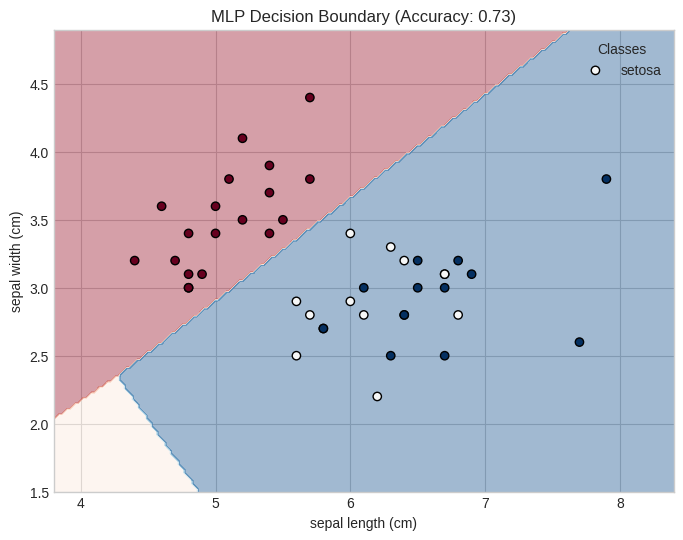

In [3]:
# @title MLP Classification Example (Iris Dataset)
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd # Added for DataFrame display

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Display sample data in a DataFrame
iris_df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])
iris_df['target_name'] = iris_df['target'].apply(lambda val: target_names[int(val)])
print("Sample from Iris Dataset:")
display(iris_df.sample(5)) # Display sample

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an MLP classifier
model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=300, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy of the MLP classifier: {accuracy:.2f}")

# --- Optional: Visualize Decision Boundary (for 2 features only) --- #
if X.shape[1] == 4: # Basic check for Iris dataset dimensions
    plt.figure(figsize=(8, 6))
    # Use only the first two features for 2D visualization
    X_2d = X[:, :2]
    X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(X_2d, y, test_size=0.3, random_state=42)
    model_2d = MLPClassifier(hidden_layer_sizes=(10,), max_iter=300, random_state=42)
    model_2d.fit(X_train_2d, y_train_2d)

    x_min, x_max = X_2d[:, 0].min() - .5, X_2d[:, 0].max() + .5
    y_min, y_max = X_2d[:, 1].min() - .5, X_2d[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdBu)

    # Plot also the training points
    scatter = plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test_2d, cmap=plt.cm.RdBu, edgecolors='k')
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title(f'MLP Decision Boundary (Accuracy: {accuracy:.2f})')
    plt.legend(*scatter.legend_elements(), title="Classes", labels=target_names)
    plt.show()
else:
    print("\n(Visualization of decision boundary skipped for higher dimensional data.)")

**Explanation:**
This code demonstrates how even a relatively simple MLP architecture can effectively learn to classify data. We used the Iris dataset, a classic in machine learning, which contains measurements of different iris flower types.

The code does the following:
1. **Loads the Iris dataset:**  This dataset is readily available in scikit-learn.
2. **Splits data:** Divides the data into training and testing sets to evaluate the model's generalization.
3. **Creates and trains an MLPClassifier:**  We use `MLPClassifier` from `scikit-learn`, setting a single hidden layer with 10 neurons (`hidden_layer_sizes=(10,)`).
4. **Predicts and evaluates:**  The trained model predicts classes for the test set, and we calculate the accuracy.
5. **(Optional) Visualizes Decision Boundary:** For the Iris dataset (which has 4 features, but we use the first two for visualization), we plot the decision boundary learned by the MLP. This gives you a visual sense of how the MLP separates the different classes.

**Experiment:**
Try changing the `hidden_layer_sizes` parameter in the `MLPClassifier` constructor (e.g., try `(20,)`, `(10, 5)`, etc.) and rerun the code. Observe how it affects the accuracy and the decision boundary (if visualized).  Does a more complex network always lead to better performance? (Hint: not necessarily, especially with small datasets!).

---

## Section 2: Convolutional Neural Networks (CNNs) - The Image Specialist

### What are Convolutional Neural Networks?

Convolutional Neural Networks (CNNs) are a specialized type of neural network that excels at processing data with a grid-like structure, most famously **images**.  However, they are also powerful for other types of data that have spatial or temporal relationships, like audio waveforms or time series data.

The core innovation in CNNs is the use of **convolutional layers**. These layers employ small filters (also called kernels) that slide systematically over the input image, performing a mathematical operation called **convolution**. This convolution operation is what allows CNNs to automatically learn spatial hierarchies of features, starting from simple features like edges and corners, and building up to more complex textures and object parts.

### Interactive Convolution Operation

To understand the magic of CNNs, let's visualize the fundamental convolution operation. We'll use a tiny example "image" and a small filter to see how it works step by step.

In [4]:
# @title Interactive Convolution Visualization
import ipywidgets as widgets
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

def convolution(image_section, kernel):
    return np.sum(image_section * kernel)

def visualize_convolution(image_data, kernel_data, step_x, step_y):
    image = np.array(image_data)
    kernel = np.array(kernel_data)
    output_height = image.shape[0] - kernel.shape[0] + 1
    output_width = image.shape[1] - kernel.shape[1] + 1
    feature_map = np.zeros((output_height, output_width))

    fig = plt.figure(figsize=(10, 5))
    gs = gridspec.GridSpec(2, 2, width_ratios=[1, 1], height_ratios=[1, 3]) # Adjust grid layout

    ax_image = plt.subplot(gs[2])
    ax_kernel = plt.subplot(gs[3])
    ax_output = plt.subplot(gs[1])
    ax_calc = plt.subplot(gs[0]) # Added subplot for calculation
    ax_calc.axis('off') # Turn off axes for calculation display

    ax_image.imshow(image, cmap='gray', interpolation='none')
    ax_image.set_title('Input "Image"')
    ax_image.set_xticks(np.arange(image.shape[1]))
    ax_image.set_yticks(np.arange(image.shape[0]))
    ax_image.grid(True, color='lightgray', linestyle='-', linewidth=1)

    ax_kernel.imshow(kernel, cmap='gray', interpolation='none')
    ax_kernel.set_title('Filter (Kernel)')
    ax_kernel.set_xticks(np.arange(kernel.shape[1]))
    ax_kernel.set_yticks(np.arange(kernel.shape[0]))
    ax_kernel.grid(True, color='lightgray', linestyle='-', linewidth=1)

    ax_output.imshow(feature_map, cmap='gray', interpolation='none')
    ax_output.set_title('Output Feature Map')
    ax_output.set_xticks(np.arange(output_width))
    ax_output.set_yticks(np.arange(output_height))
    ax_output.grid(True, color='lightgray', linestyle='-', linewidth=1)

    # Highlight the current section being convolved
    rect = plt.Rectangle((step_x, step_y), kernel.shape[1], kernel.shape[0], linewidth=2, edgecolor='red', facecolor='none')
    ax_image.add_patch(rect)

    image_section = image[step_y:step_y + kernel.shape[0], step_x:step_x + kernel.shape[1]]
    output_value = convolution(image_section, kernel)
    feature_map[step_y, step_x] = output_value # Update feature map value
    ax_output.imshow(feature_map, cmap='gray', interpolation='none') # Re-render feature map

    # Display calculation in the new subplot
    calc_text = "Convolution Calculation:\n"
    for i in range(kernel.shape[0]):
        for j in range(kernel.shape[1]):
            calc_text += f"({image_section[i, j]:.0f} * {kernel[i, j]:.1f}) + "
    calc_text = calc_text[:-3] + f" = {output_value:.2f}" # Remove last '+ ' and add result
    ax_calc.text(0.1, 0.5, calc_text, fontsize=12, verticalalignment='center')

    plt.tight_layout()
    plt.show()

# --- Example Image and Kernel --- #
example_image = [
    [100, 110, 90, 90, 90],
    [100, 110, 90, 90, 90],
    [100, 110, 150, 150, 150],
    [100, 110, 150, 150, 150],
    [100, 110, 150, 150, 150]
]
example_kernel = [
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
]

# --- Interactive Controls --- #
max_steps_x = len(example_image[0]) - len(example_kernel[0])
max_steps_y = len(example_image) - len(example_kernel)

step_x_slider = widgets.IntSlider(min=0, max=max_steps_x, step=1, value=0, description='Step X:')
step_y_slider = widgets.IntSlider(min=0, max=max_steps_y, step=1, value=0, description='Step Y:')

interactive_conv = widgets.interactive(
    visualize_convolution,
    image_data=widgets.fixed(example_image),
    kernel_data=widgets.fixed(example_kernel),
    step_x=step_x_slider,
    step_y=step_y_slider
)

output_conv_viz = widgets.Output()

def on_step_change(change):
    with output_conv_viz:
        output_conv_viz.clear_output(wait=True)
        visualize_convolution(example_image, example_kernel, step_x_slider.value, step_y_slider.value)

step_x_slider.observe(on_step_change, names='value')
step_y_slider.observe(on_step_change, names='value')

display(widgets.VBox([step_x_slider, step_y_slider, output_conv_viz]))
on_step_change(None) # Initial visualization

**Experiment:**
Use the **Step X** and **Step Y** sliders to move the red box (representing the filter) across the input "image". Observe the following:
- **Input "Image"**: The top-left grid represents our 5x5 input "image". The red box highlights the section currently being processed.
- **Filter (Kernel)**: The top-right grid shows our 3x3 filter (kernel). Notice the values; this particular kernel is designed to detect vertical edges.
- **Output Feature Map**: The bottom-right grid shows the developing "feature map". Each cell's value is the result of the convolution operation at that location.
- **Convolution Calculation**:  The top-middle area now displays the step-by-step calculation for the current convolution operation, showing how each element in the image section is multiplied by the corresponding filter element, and then summed.

See how the filter moves across the "image", and how the output value in the "feature map" is calculated based on the filter and the corresponding section of the input. This sliding and convolving is the core operation in CNNs, allowing them to detect patterns regardless of their location in the image!

**Experiment:**
Use the **Step X** and **Step Y** sliders to move the red box (representing the filter) across the input "image". Observe the following:
- **Input "Image"**: The top-left grid represents our 5x5 input "image". The red box highlights the section currently being processed.
- **Filter (Kernel)**: The top-right grid shows our 3x3 filter (kernel). Notice the values; this particular kernel is designed to detect vertical edges.
- **Output Feature Map**: The bottom-right grid shows the developing "feature map". Each cell's value is the result of the convolution operation at that location.
- **Convolution Calculation**:  The top-middle area now displays the step-by-step calculation for the current convolution operation, showing how each element in the image section is multiplied by the corresponding filter element, and then summed.

See how the filter moves across the "image", and how the output value in the "feature map" is calculated based on the filter and the corresponding section of the input. This sliding and convolving is the core operation in CNNs, allowing them to detect patterns regardless of their location in the image!

### Visualizing Feature Maps

When we apply *multiple* filters (kernels) to an image, each filter learns to detect different types of features. The output from each filter, after sliding across the entire image, is called a **feature map**. Let's visualize some feature maps generated by a simple Convolutional layer.

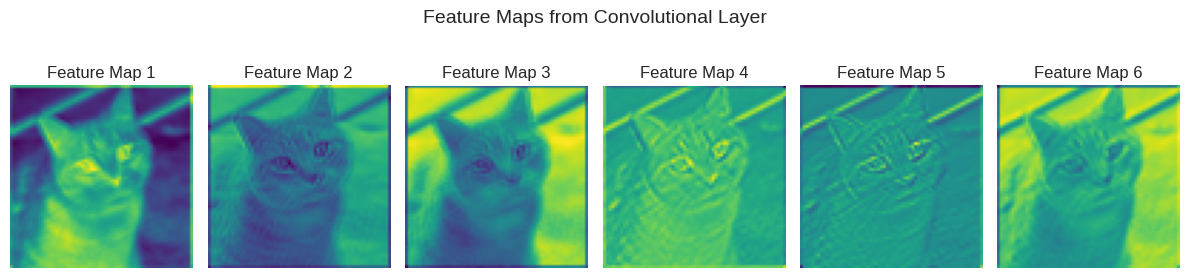

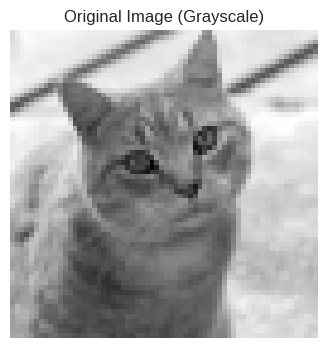

In [5]:
# @title Feature Map Visualization
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image # Using PIL instead of matplotlib.image for simpler image loading
import urllib.request # To fetch image from URL
import io # For handling image bytes

# --- Load Example Image --- #
image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Cat03.jpg/1200px-Cat03.jpg" # Example cat image from Wikimedia
try:
    image_bytes = urllib.request.urlopen(image_url).read()
    image_pil = Image.open(io.BytesIO(image_bytes)).convert('L') # Open image from bytes, convert to grayscale
    image_pil = image_pil.resize((64, 64)) # Resize for faster processing and visualization
    image_np = np.array(image_pil).astype(np.float32) / 255. # Normalize to 0-1 and to float32
except Exception as e:
    print(f"Error loading image: {e}. Using placeholder.")
    image_np = np.zeros((64, 64), dtype=np.float32) # Placeholder if image loading fails

image_tensor = torch.tensor(image_np).unsqueeze(0).unsqueeze(0) # [1, 1, H, W] (batch, channel, height, width)

# --- Define a Simple Convolutional Layer --- #
conv_layer = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=3, stride=1, padding=1) # 6 filters

# --- Pass image through the convolutional layer --- #
with torch.no_grad(): # Disable gradient calculation for inference
    feature_maps = conv_layer(image_tensor)
feature_maps_np = feature_maps.squeeze().cpu().numpy() # Remove batch and channel dimensions, convert to NumPy

# --- Visualize Feature Maps --- #
num_feature_maps = feature_maps_np.shape[0]
fig, axes = plt.subplots(1, num_feature_maps, figsize=(12, 3)) # Adjust figure size
if num_feature_maps == 1:  # Handle single feature map case to avoid iteration issues
    axes = [axes] # Make it iterable

for i, ax in enumerate(axes):
    ax.imshow(feature_maps_np[i], cmap='viridis')
    ax.set_title(f'Feature Map {i+1}')
    ax.axis('off')

plt.suptitle('Feature Maps from Convolutional Layer', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95]) # Adjust layout to fit title
plt.show()

# --- Display Original Image --- #
plt.figure(figsize=(4, 4))
plt.imshow(image_np, cmap='gray')
plt.title('Original Image (Grayscale)')
plt.axis('off')
plt.show()

**Explanation:**
Each of these images is a different **feature map**, the output of a different filter within our convolutional layer.  Observe how:
- **Different feature maps highlight different aspects:** Some might emphasize edges, others textures, or certain patterns in the original image.
- **CNNs learn to "see"**: This is how CNNs begin to "see" and extract meaningful features from raw pixel data.  The filters in convolutional layers act as learned feature detectors.

The initial filters in a CNN typically learn to detect very basic features like edges and corners. As you go deeper into the network (more convolutional layers), the filters learn to detect increasingly complex and abstract features, eventually recognizing objects or scenes.

### (Optional) Visualizing Filters (Kernels)

The filters themselves are small matrices of numbers that the CNN *learns* during training. Visualizing these learned filters can sometimes give us a hint about what kind of features the network is sensitive to.

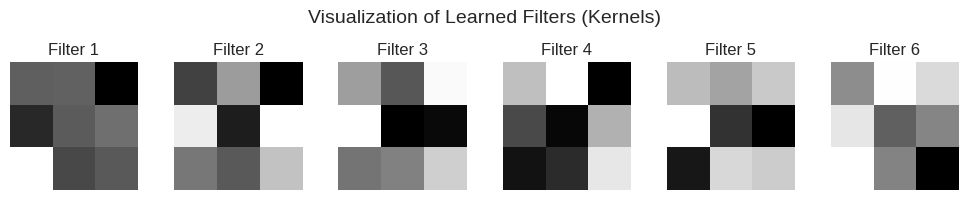

In [6]:
# @title (Optional) Filter Visualization
import matplotlib.pyplot as plt

# --- Get the learned filters from the convolutional layer --- #
filters = conv_layer.weight.detach().cpu().numpy() # Extract filter weights

# --- Visualize Filters --- #
num_filters = filters.shape[0]
fig, axes = plt.subplots(1, num_filters, figsize=(10, 2)) # Adjust figure size
if num_filters == 1: # Handle single filter case to avoid iteration issues
    axes = [axes] # Make it iterable

for i, ax in enumerate(axes):
    # For visualization, scale filter values to 0-1 range (for display purposes)
    filter_img = filters[i, 0, :, :] # Assuming grayscale (channel 0)
    filter_min, filter_max = filter_img.min(), filter_img.max()
    filter_scaled = (filter_img - filter_min) / (filter_max - filter_min) if filter_max > filter_min else np.zeros_like(filter_img)
    ax.imshow(filter_scaled, cmap='gray') # Display as grayscale
    ax.set_title(f'Filter {i+1}')
    ax.axis('off')

plt.suptitle('Visualization of Learned Filters (Kernels)', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95]) # Adjust layout to fit title
plt.show()

**Explanation (Optional):**
These are visualizations of the **filters (kernels)** that our simple convolutional layer has initialized (before any training).  In a trained CNN, these filters would be learned to detect specific features. Even in these randomly initialized filters, you might vaguely discern some patterns (though they will become much more defined after training on image data).

In a well-trained CNN, some filters might visually resemble edge detectors (like the example kernel we used in the interactive convolution demo), while others might be more complex, responding to textures, corners, or combinations of visual elements.

---

## Section 3: Recurrent Neural Networks (RNNs) - The Sequence Thinker

### What are Recurrent Neural Networks?

Recurrent Neural Networks (RNNs) are a class of neural networks specifically designed to process **sequential data**. This is data where the order of elements is crucial, such as:
- **Text:** Words in a sentence have a specific order that conveys meaning.
- **Audio:** Sound waveforms unfold over time.
- **Time Series:** Stock prices, sensor readings, etc., are sequences of values ordered by time.

The key difference that sets RNNs apart from MLPs and CNNs is their ability to maintain a kind of "memory".  RNNs can use information from *previous* steps in a sequence to influence the processing of the *current* step. This is achieved through a **hidden state**, which acts as the RNN's memory. The hidden state is updated at each time step as the RNN processes the sequence, and it carries information forward in time.

### Interactive "Unrolled" RNN Diagram

To visualize how RNNs process sequences and maintain memory, it's helpful to imagine "unrolling" the RNN through time.  This diagram will help you understand the flow of information and the role of the hidden state.

In [7]:
# @title Interactive Unrolled RNN
import ipywidgets as widgets
from IPython.display import display, HTML

def display_rnn_unrolled(time_step):
    num_steps = 5 # Fixed number of time steps for visualization
    diagram_str = """
    <style>
    .rnn-box { border: 2px solid black; padding: 10px; margin: 5px; text-align: center; }
    .input-box { border: 2px dashed green; padding: 10px; margin: 5px; text-align: center; }
    .hidden-box { border: 2px dashed blue; padding: 10px; margin: 5px; text-align: center; }
    .output-box { border: 2px dashed red; padding: 10px; margin: 5px; text-align: center; }
    .arrow { position: relative; top: -10px; display: inline-block; font-size: 20px; }
    .highlight { background-color: lightyellow; }
    </style>
    <div style='display: flex; justify-content: center; align-items: flex-start;'>
    """

    for i in range(num_steps):
        highlight_class = ' highlight' if i == time_step else ''
        diagram_str += f'''
        <div style='margin: 10px;'>
            <div class='input-box{highlight_class}'>Input<br>x<sub>{i}</sub></div>
            {'<div class="arrow">↓</div>' if i == 0 else '<div class="arrow" style="visibility: hidden;">↓</div>'}
            <div class='rnn-box{highlight_class}'>RNN Cell</div>
            <div class='arrow'>↓</div>
            <div class='output-box{highlight_class}'>Output<br>y<sub>{i}</sub></div>
        </div>
        '''
        if i < num_steps - 1:
            diagram_str += f'''
            <div style='margin: 10px; text-align: center;'>
                <div class='arrow'>→</div>
                <div class='hidden-box{highlight_class}'>Hidden State<br>h<sub>{i}</sub></div>
                <div class='arrow'>→</div>
            </div>
            '''

    diagram_str += """
    </div>
    """
    display(HTML(diagram_str))

# --- Time Step Slider --- #
time_step_slider = widgets.IntSlider(min=0, max=4, step=1, value=0, description='Time Step:')
interactive_rnn_diagram = widgets.interactive(display_rnn_unrolled, time_step=time_step_slider)

display(interactive_rnn_diagram)

interactive(children=(IntSlider(value=0, description='Time Step:', max=4), Output()), _dom_classes=('widget-in…

**Experiment:**
Use the **Time Step** slider to step through the sequence from time step 0 to 4. Observe how:
- **Input x<sub>t</sub>**: At each time step, an input from the sequence (x<sub>0</sub>, x<sub>1</sub>, x<sub>2</sub>, ...) is fed into the RNN cell.
- **RNN Cell**:  This represents the core RNN computation at each step. It processes the current input *and* the hidden state from the *previous* step.
- **Hidden State h<sub>t</sub>**: The hidden state (h<sub>0</sub>, h<sub>1</sub>, h<sub>2</sub>, ...) is the RNN's "memory". It's updated at each time step and passed along to the next step, carrying information about the sequence history.
- **Output y<sub>t</sub>**:  At each time step, the RNN produces an output (y<sub>0</sub>, y<sub>1</sub>, y<sub>2</sub>, ...). The output at each step can depend on the entire sequence processed so far, thanks to the hidden state.

This "unrolled" view emphasizes how RNNs process sequences sequentially, maintaining context through the hidden state. This memory mechanism is what makes RNNs powerful for tasks where understanding the order of information is essential.

### Example Problem: Simple Sentiment Analysis with an RNN

Let's put a basic RNN to work on a simple sentiment analysis task: determining if a short text review is positive or negative. We'll use `Keras` to build and train a simple RNN model quickly.

In [8]:
# @title RNN Sentiment Analysis Example
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# --- Sample Text Data --- #
texts = [
    "This movie was absolutely fantastic!",
    "I really disliked this film, it was boring.",
    "The acting was amazing and the story was captivating.",
    "Plot was terrible and predictable, waste of time.",
    "A truly wonderful and heartwarming experience.",
    "Could not finish watching, it was so bad."
]
labels = np.array([1, 0, 1, 0, 1, 0]) # 1 for positive, 0 for negative

# --- Tokenize Text --- #
tokenizer = Tokenizer(num_words=100) # Limit vocabulary size
tokenizer.fit_on_texts(texts) # Train tokenizer on texts
sequences = tokenizer.texts_to_sequences(texts) # Convert texts to sequences of integers
padded_sequences = pad_sequences(sequences) # Pad sequences to have the same length

# --- Define Simple RNN Model --- #
model = Sequential([
    Embedding(input_dim=100, output_dim=8, input_length=padded_sequences.shape[1]), # Embedding layer
    SimpleRNN(units=16), # SimpleRNN layer with 16 units
    Dense(1, activation='sigmoid') # Output layer (sigmoid for binary classification)
])

# --- Compile Model --- #
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # Binary crossentropy loss

# --- Train Model --- #
model.fit(padded_sequences, labels, epochs=20, verbose=0) # Train for 20 epochs

# --- Test Model with New Text --- #
new_text = ["This movie was surprisingly good.", "Absolutely awful and disappointing!"]
new_sequences = tokenizer.texts_to_sequences(new_text)
padded_new_sequences = pad_sequences(new_sequences, maxlen=padded_sequences.shape[1])
predictions = model.predict(padded_new_sequences)

print("Sentiment Predictions:")
for i, text in enumerate(new_text):
    sentiment = "Positive" if predictions[i][0] > 0.5 else "Negative"
    confidence = predictions[i][0] if sentiment == "Positive" else 1 - predictions[i][0]
    print(f"Text: '{text}' -> Sentiment: {sentiment} (Confidence: {confidence:.2f})")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
Sentiment Predictions:
Text: 'This movie was surprisingly good.' -> Sentiment: Positive (Confidence: 0.54)
Text: 'Absolutely awful and disappointing!' -> Sentiment: Positive (Confidence: 0.55)


**Explanation:**
This example demonstrates how an RNN can learn to understand sentiment from text. The RNN processes the text word by word (or token by token) and uses its hidden state to accumulate information about the sentiment as it reads the sentence.

The code does the following:
1. **Sample Text Data:**  We have a small set of movie reviews labeled as positive (1) or negative (0).
2. **Tokenization and Padding:**
   - **Tokenizer:**  We use a `Tokenizer` to convert words into numerical IDs (tokens). This is essential because neural networks work with numbers.
   - **Padding:** We use `pad_sequences` to make sure all input sequences have the same length. RNNs typically process sequences in batches, and batches require consistent input shapes.
3. **Define Simple RNN Model:**
   - **Embedding Layer:**  The `Embedding` layer converts word IDs into dense vector representations (word embeddings). This helps the model capture semantic relationships between words.
   - **SimpleRNN Layer:** This is the core RNN layer. It processes the embedded word vectors sequentially and maintains the hidden state.
   - **Dense Layer:**  The final `Dense` layer with a sigmoid activation outputs a probability between 0 and 1, representing the sentiment (close to 1 for positive, close to 0 for negative).
4. **Train Model:** We train the RNN model on our small dataset.
5. **Test with New Text:** We try out the trained model on new, unseen sentences and see how it predicts the sentiment.

**Experiment:**
Try changing the `new_text` examples to different movie reviews and rerun the code. Observe how the sentiment prediction changes.  Also, try adding more training examples to the `texts` list and see if it improves the model's ability to generalize to new sentences (though for significant improvement, you'd need a much larger and more diverse dataset!).

### (Optional) Simplified Hidden State Visualization

(This is a more advanced visualization and might be skipped depending on time and audience interest). We can attempt to visualize, in a very simplified way, how the hidden state of the RNN evolves as it processes a sentence.  Note that visualizing the full hidden state in a meaningful way for complex RNNs is generally challenging, so we'll focus on a basic illustration.

In [9]:
# @title (Optional) Hidden State Visualization (Simplified)
import matplotlib.pyplot as plt
import numpy as np

def visualize_hidden_state(text_to_analyze):
    # --- Tokenize and Pad the Text --- #
    sequence = tokenizer.texts_to_sequences([text_to_analyze])
    padded_sequence = pad_sequences(sequence, maxlen=padded_sequences.shape[1])

    # --- Get Hidden State Output --- #
    intermediate_layer_model = Sequential([ # Create a model to output hidden states
        model.layers[0], # Embedding layer
        SimpleRNN(units=16, return_sequences=True, stateful=False) # RNN layer, return all hidden states
    ])
    hidden_states = intermediate_layer_model.predict(padded_sequence)
    hidden_states = np.squeeze(hidden_states) # Remove batch dimension

    # --- Plot Hidden State Values (Simplified: magnitude over time) --- #
    hidden_state_magnitude = np.linalg.norm(hidden_states, axis=1) # Calculate magnitude at each time step
    time_steps = range(hidden_states.shape[0])

    plt.figure(figsize=(10, 4))
    plt.plot(time_steps, hidden_state_magnitude, marker='o')
    plt.xticks(time_steps, [f'Word {i+1}' for i in time_steps]) # Label x-axis with word/token index
    plt.xlabel('Time Step (Word in Sequence)')
    plt.ylabel('Magnitude of Hidden State Vector')
    plt.title(f'Simplified Hidden State Evolution for: "{text_to_analyze}"')
    plt.grid(True)
    plt.show()

# --- Text Input Widget --- #
text_input = widgets.Textarea(value='This movie was great!', description='Text to Analyze:', disabled=False)
analyze_button = widgets.Button(description='Analyze Hidden State')
output_hidden_state_viz = widgets.Output()

def on_button_clicked_hidden_state(b):
    with output_hidden_state_viz:
        output_hidden_state_viz.clear_output(wait=True)
        visualize_hidden_state(text_input.value)

analyze_button.on_click(on_button_clicked_hidden_state)

display(widgets.VBox([text_input, analyze_button, output_hidden_state_viz]))

**Explanation (Optional):**
This visualization provides a highly simplified view of the RNN's hidden state as it processes the input text.  The plot shows (an approximation of) the *magnitude* of the hidden state vector at each time step (roughly corresponding to each word in the input text).

**Important Limitations:**
- **Simplified Magnitude:** We are plotting the overall magnitude of the hidden state vector, which is a simplification. The hidden state is a vector with multiple dimensions, and each dimension might be capturing different aspects of the sequence context. This 2D plot collapses that multi-dimensional information.
- **Approximation:** Extracting hidden states directly like this from Keras `SimpleRNN` for every time step might not always be straightforward for all RNN types or frameworks. This is a simplified illustration.
- **No Direct Interpretation:**  It's generally difficult to directly interpret the meaning of individual dimensions in the hidden state vector. They are learned representations, and their meaning is distributed and often not human-interpretable in a simple way.

**Experiment (Optional):**
Try typing different sentences into the "Text to Analyze" box and click "Analyze Hidden State". Observe how the plot changes for sentences with different sentiment or meaning.  While it's a simplified view, it can give you a *very rough* sense of how the RNN's internal state evolves as it processes text.

In [10]:
# Neural Network Architecture Visualizations
# Install required packages if not already installed
# !pip install plotly numpy

import plotly.graph_objects as go
import plotly.subplots as sp
import numpy as np
from IPython.display import display, HTML

# Set a consistent color scheme for all visualizations
COLOR_INPUT = 'rgba(99, 110, 250, 0.7)'     # Blue
COLOR_HIDDEN = 'rgba(239, 85, 59, 0.7)'     # Red
COLOR_OUTPUT = 'rgba(0, 204, 150, 0.7)'     # Green
COLOR_EDGE = 'rgba(210, 210, 210, 0.8)'     # Light Gray
COLOR_ACTIVE = 'rgba(255, 215, 0, 0.9)'     # Gold (for activations)
COLOR_CONV = 'rgba(255, 127, 14, 0.7)'      # Orange (for conv layers)
COLOR_POOL = 'rgba(148, 103, 189, 0.7)'     # Purple (for pooling)
COLOR_RECURRENT = 'rgba(140, 86, 75, 0.7)'  # Brown (for recurrent connections)
BACKGROUND = 'rgba(248, 248, 248, 0.95)'    # Light background

# Helper functions for all visualizations
def create_base_layout(title):
    """Creates a base layout with consistent styling."""
    return {
        'title': {
            'text': title,
            'font': {'size': 24, 'family': 'Arial, sans-serif'}
        },
        'paper_bgcolor': BACKGROUND,
        'plot_bgcolor': BACKGROUND,
        'margin': {'l': 20, 'r': 20, 't': 60, 'b': 20},
        'showlegend': True,
        'legend': {'x': 1.05, 'y': 1},
        'hovermode': 'closest',
        'transition': {'duration': 500}
    }

# ============= MLP VISUALIZATION =============

def create_mlp_visualization():
    """Create an interactive MLP visualization."""
    # Create figure
    fig = go.Figure(layout=create_base_layout('Multilayer Perceptron (MLP)'))

    # Define the network architecture
    n_input = 4
    n_hidden = [5, 3]
    n_output = 2

    # Node positions
    layer_spacing = 4
    vertical_spacing = 1.5

    # Prepare lists for nodes and edges
    nodes_x, nodes_y, nodes_text, nodes_color, nodes_size = [], [], [], [], []
    edges_x, edges_y = [], []

    # Keep track of node indices for each layer
    layer_indices = {}
    current_idx = 0

    # Create input layer
    layer_x = 0
    layer_indices['input'] = list(range(current_idx, current_idx + n_input))
    for i in range(n_input):
        y_pos = (i - (n_input-1)/2) * vertical_spacing
        nodes_x.append(layer_x)
        nodes_y.append(y_pos)
        nodes_text.append(f'Input {i+1}')
        nodes_color.append(COLOR_INPUT)
        nodes_size.append(25)
    current_idx += n_input

    # Create hidden layers
    for l, layer_size in enumerate(n_hidden):
        layer_x += layer_spacing
        layer_indices[f'hidden_{l}'] = list(range(current_idx, current_idx + layer_size))
        for i in range(layer_size):
            y_pos = (i - (layer_size-1)/2) * vertical_spacing
            nodes_x.append(layer_x)
            nodes_y.append(y_pos)
            nodes_text.append(f'H{l+1},{i+1}')
            nodes_color.append(COLOR_HIDDEN)
            nodes_size.append(25)

            # Connect to previous layer
            prev_layer_key = 'input' if l == 0 else f'hidden_{l-1}'
            prev_layer_indices = layer_indices[prev_layer_key]
            curr_node_idx = current_idx + i

            for prev_idx in prev_layer_indices:
                edges_x.extend([nodes_x[prev_idx], nodes_x[curr_node_idx], None])
                edges_y.extend([nodes_y[prev_idx], nodes_y[curr_node_idx], None])

        current_idx += layer_size

    # Create output layer
    layer_x += layer_spacing
    layer_indices['output'] = list(range(current_idx, current_idx + n_output))
    for i in range(n_output):
        y_pos = (i - (n_output-1)/2) * vertical_spacing
        nodes_x.append(layer_x)
        nodes_y.append(y_pos)
        nodes_text.append(f'Output {i+1}')
        nodes_color.append(COLOR_OUTPUT)
        nodes_size.append(25)

        # Connect to last hidden layer
        prev_layer_indices = layer_indices[f'hidden_{len(n_hidden)-1}']
        curr_node_idx = current_idx + i

        for prev_idx in prev_layer_indices:
            edges_x.extend([nodes_x[prev_idx], nodes_x[curr_node_idx], None])
            edges_y.extend([nodes_y[prev_idx], nodes_y[curr_node_idx], None])

    # Add edges (connections)
    fig.add_trace(go.Scatter(
        x=edges_x, y=edges_y, mode='lines',
        line={'color': COLOR_EDGE, 'width': 1},
        hoverinfo='none', showlegend=False
    ))

    # Add nodes
    fig.add_trace(go.Scatter(
        x=nodes_x, y=nodes_y, mode='markers+text',
        marker={
            'color': nodes_color,
            'size': nodes_size,
            'line': {'color': 'black', 'width': 1}
        },
        text=nodes_text,
        textposition='bottom center',
        hoverinfo='text',
        name='Neurons'
    ))

    # Update layout
    fig.update_layout(
        xaxis={'showgrid': False, 'zeroline': False, 'showticklabels': False},
        yaxis={'showgrid': False, 'zeroline': False, 'showticklabels': False},
        annotations=[
            {'x': 0, 'y': (n_input+0.5) * vertical_spacing, 'text': 'Input Layer', 'showarrow': False, 'font': {'size': 14}},
            {'x': layer_spacing, 'y': (n_hidden[0]+0.5) * vertical_spacing, 'text': 'Hidden Layer 1', 'showarrow': False, 'font': {'size': 14}},
            {'x': 2*layer_spacing, 'y': (n_hidden[1]+0.5) * vertical_spacing, 'text': 'Hidden Layer 2', 'showarrow': False, 'font': {'size': 14}},
            {'x': 3*layer_spacing, 'y': (n_output+0.5) * vertical_spacing, 'text': 'Output Layer', 'showarrow': False, 'font': {'size': 14}}
        ],
        height=600,
        width=900,
        title_font=dict(size=24)
    )

    # Add real-world example for context
    fig.add_annotation(
        x=2.5*layer_spacing, y=-(n_input+0.7) * vertical_spacing,
        text="""<b>MLP in Real Life:</b> Image Recognition<br>
• Input: Pixel values from an image<br>
• Hidden Layers: Extract patterns and features<br>
• Output: Probability of each possible class<br>
• Example: Identifying handwritten digits (0-9)""",
        showarrow=False,
        bordercolor='black',
        borderwidth=1,
        borderpad=4,
        bgcolor='white',
        opacity=0.9,
        align="left"
    )

    # Add explanatory description
    fig.add_annotation(
        x=0.5*layer_spacing, y=-(n_input+0.7) * vertical_spacing,
        text="""<b>Key Features:</b><br>
• Fully connected layers<br>
• Each connection has a weight<br>
• Non-linear activation functions<br>
• No memory of previous inputs""",
        showarrow=False,
        bordercolor='black',
        borderwidth=1,
        borderpad=4,
        bgcolor='white',
        opacity=0.9,
        align="left"
    )

    return fig

# ============= CNN VISUALIZATION =============

def create_cnn_visualization():
    """Create an interactive CNN visualization with clearer layout like the screenshot."""
    # Create figure with subplots
    fig = sp.make_subplots(
        rows=2, cols=1,
        subplot_titles=('<b>Convolutional Neural Network Architecture</b>', '<b>How Convolution Works</b>'),
        vertical_spacing=0.25,
        specs=[[{"type": "scatter"}], [{"type": "scatter"}]]
    )

    # Define architecture components - simplify design to match screenshot
    components = [
        {"name": "Input Image", "width": 2, "height": 3, "depth": 3, "color": COLOR_INPUT, "x": 1, "feature_text": ""},
        {"name": "Conv Layer 1", "width": 1.8, "height": 2.7, "depth": 6, "color": COLOR_CONV, "x": 5, "feature_text": "6 feature maps"},
        {"name": "Pool Layer 1", "width": 1.2, "height": 1.8, "depth": 6, "color": COLOR_POOL, "x": 8, "feature_text": "6 feature maps"},
        {"name": "Conv Layer 2", "width": 1, "height": 1.5, "depth": 12, "color": COLOR_CONV, "x": 11, "feature_text": "12 feature maps"},
        {"name": "Pool Layer 2", "width": 0.7, "height": 1, "depth": 12, "color": COLOR_POOL, "x": 14, "feature_text": "12 feature maps"},
        {"name": "Flatten", "width": 0.6, "height": 3, "depth": 1, "color": "#FF9D6F", "x": 17, "feature_text": ""},
        {"name": "FC Layer", "width": 0.6, "height": 2, "depth": 1, "color": COLOR_HIDDEN, "x": 20, "feature_text": ""},
        {"name": "Output", "width": 0.6, "height": 1, "depth": 1, "color": COLOR_OUTPUT, "x": 23, "feature_text": ""}
    ]

    # Draw the component blocks
    for i, comp in enumerate(components):
        # Main block
        fig.add_trace(
            go.Scatter(
                x=[comp["x"], comp["x"]+comp["width"], comp["x"]+comp["width"], comp["x"], comp["x"]],
                y=[0, 0, comp["height"], comp["height"], 0],
                mode="lines",
                fill="toself",
                fillcolor=comp["color"],
                line=dict(color="black", width=1),
                name=comp["name"],
                showlegend=True,
            ),
            row=1, col=1
        )

        # Add component name below the block
        fig.add_annotation(
            x=comp["x"] + comp["width"]/2,
            y=-0.5,
            text=comp["name"],
            showarrow=False,
            font=dict(size=12),
            row=1, col=1
        )

        # Add feature map count text if it exists
        if comp["feature_text"]:
            fig.add_annotation(
                x=comp["x"] + comp["width"]/2,
                y=comp["height"] + 0.3,
                text=comp["feature_text"],
                showarrow=False,
                font=dict(size=10),
                row=1, col=1
            )

        # Add feature maps/depth visualization for convolutional and pooling layers
        if "Conv" in comp["name"] or "Pool" in comp["name"]:
            for d in range(min(3, comp["depth"])):
                offset = d * 0.2
                fig.add_trace(
                    go.Scatter(
                        x=[comp["x"]+offset, comp["x"]+offset+comp["width"], comp["x"]+offset+comp["width"], comp["x"]+offset, comp["x"]+offset],
                        y=[offset, offset, offset+comp["height"], offset+comp["height"], offset],
                        mode="lines",
                        line=dict(color="black", width=1, dash="dot"),
                        showlegend=False
                    ),
                    row=1, col=1
                )

    # Add explanatory callouts like in the screenshot
    fig.add_annotation(
        x=components[1]["x"],
        y=components[1]["height"] + 1,
        text="Sliding filter<br>detects patterns",
        showarrow=True,
        arrowhead=1,
        ax=components[1]["x"],
        ay=components[1]["height"] + 0.4,
        font=dict(size=12),
        bgcolor="white",
        bordercolor="black",
        borderwidth=1,
        row=1, col=1
    )

    fig.add_annotation(
        x=components[2]["x"],
        y=components[2]["height"] + 1,
        text="Pooling reduces size<br>while keeping features",
        showarrow=True,
        arrowhead=1,
        ax=components[2]["x"],
        ay=components[2]["height"] + 0.4,
        font=dict(size=12),
        bgcolor="white",
        bordercolor="black",
        borderwidth=1,
        row=1, col=1
    )

    # Add arrows connecting components
    for i in range(len(components)-1):
        fig.add_annotation(
            x=components[i+1]["x"] - 0.5,
            y=components[i]["height"]/2,
            ax=components[i]["x"] + components[i]["width"] + 0.5,
            ay=components[i]["height"]/2,
            axref="x", ayref="y",
            xref="x", yref="y",
            showarrow=True,
            arrowhead=2,
            arrowsize=1,
            arrowwidth=2,
            row=1, col=1
        )

    # Bottom section - How Convolution Works
    # Create a grid-based representation similar to the screenshot

    # Input image with a vertical edge
    image_size = 7
    kernel_size = 3
    grid_spacing = 1.2

    # Create a simple image with vertical edge
    input_image_x_offset = 2
    input_image_y_offset = 14

    # Draw grid for input image
    for i in range(image_size):
        for j in range(image_size):
            # Determine cell color (create a vertical edge pattern)
            if j == image_size//2-1:
                cell_color = 'white'
            elif j == image_size//2 or j == image_size//2+1:
                cell_color = COLOR_INPUT
            else:
                cell_color = 'white'

            # Draw cell
            fig.add_shape(
                type="circle",
                x0=input_image_x_offset + j*grid_spacing,
                y0=input_image_y_offset + i*grid_spacing,
                x1=input_image_x_offset + (j+1)*grid_spacing,
                y1=input_image_y_offset + (i+1)*grid_spacing,
                line=dict(color="black", width=1),
                fillcolor=cell_color,
                row=2, col=1
            )

    # Add input image label
    fig.add_annotation(
        x=input_image_x_offset + (image_size*grid_spacing)/2,
        y=input_image_y_offset + image_size*grid_spacing + 1,
        text="<b>Input Image</b><br>(Vertical edge)",
        showarrow=False,
        font=dict(size=12),
        row=2, col=1
    )

    # Highlight current filter position with red box
    filter_pos_x = 2
    filter_pos_y = 2
    fig.add_shape(
        type="rect",
        x0=input_image_x_offset + filter_pos_x*grid_spacing - 0.1,
        y0=input_image_y_offset + filter_pos_y*grid_spacing - 0.1,
        x1=input_image_x_offset + (filter_pos_x+kernel_size)*grid_spacing + 0.1,
        y1=input_image_y_offset + (filter_pos_y+kernel_size)*grid_spacing + 0.1,
        line=dict(color="red", width=2),
        fillcolor="rgba(0,0,0,0)",
        row=2, col=1
    )

    # Add "sliding" text with arrow
    fig.add_annotation(
        x=input_image_x_offset + filter_pos_x*grid_spacing - 1,
        y=input_image_y_offset + filter_pos_y*grid_spacing - 1,
        text="sliding",
        showarrow=True,
        arrowhead=1,
        ax=input_image_x_offset + filter_pos_x*grid_spacing + 1,
        ay=input_image_y_offset + filter_pos_y*grid_spacing + 1,
        font=dict(size=10),
        row=2, col=1
    )

    # Draw kernel/filter
    kernel_x_offset = input_image_x_offset + image_size*grid_spacing + 3
    kernel_y_offset = input_image_y_offset + 2*grid_spacing

    # Vertical edge detection kernel
    kernel = [[-1, 0, 1],
              [-1, 0, 1],
              [-1, 0, 1]]

    # Draw kernel/filter cells
    for i in range(kernel_size):
        for j in range(kernel_size):
            # Determine cell color based on value
            if kernel[i][j] == -1:
                cell_color = 'blue'
                text_color = 'white'
            elif kernel[i][j] == 0:
                cell_color = 'white'
                text_color = 'black'
            else:  # 1
                cell_color = 'red'
                text_color = 'white'

            # Draw cell
            fig.add_shape(
                type="circle",
                x0=kernel_x_offset + j*grid_spacing,
                y0=kernel_y_offset + i*grid_spacing,
                x1=kernel_x_offset + (j+1)*grid_spacing,
                y1=kernel_y_offset + (i+1)*grid_spacing,
                line=dict(color="black", width=1),
                fillcolor=cell_color,
                row=2, col=1
            )

            # Add value text
            fig.add_annotation(
                x=kernel_x_offset + (j+0.5)*grid_spacing,
                y=kernel_y_offset + (i+0.5)*grid_spacing,
                text=str(kernel[i][j]),
                showarrow=False,
                font=dict(color=text_color),
                row=2, col=1
            )

    # Add kernel label
    fig.add_annotation(
        x=kernel_x_offset + (kernel_size*grid_spacing)/2,
        y=kernel_y_offset + kernel_size*grid_spacing + 1,
        text="<b>Filter/Kernel</b><br>(Edge detector)",
        showarrow=False,
        font=dict(size=12),
        row=2, col=1
    )

    # Draw output feature map
    feature_map_size = image_size - kernel_size + 1
    feature_map_x_offset = kernel_x_offset + kernel_size*grid_spacing + 3
    feature_map_y_offset = input_image_y_offset + grid_spacing

    # Create simple feature map output (highlight the edges)
    feature_map = np.zeros((feature_map_size, feature_map_size))
    for i in range(feature_map_size):
        for j in range(feature_map_size):
            if j == 0 or j == feature_map_size-1:
                feature_map[i,j] = 0
            elif j == 1:
                feature_map[i,j] = 3
            elif j == 2:
                feature_map[i,j] = -3
            else:
                feature_map[i,j] = 0

    # Draw feature map cells
    for i in range(feature_map_size):
        for j in range(feature_map_size):
            # Determine cell color based on calculated value
            value = feature_map[i,j]
            if value < 0:
                intensity = min(1, abs(value)/3)
                cell_color = f'rgba(0, 0, 255, {intensity})'
                text_color = 'white' if intensity > 0.5 else 'black'
            elif value > 0:
                intensity = min(1, value/3)
                cell_color = f'rgba(255, 0, 0, {intensity})'
                text_color = 'white' if intensity > 0.5 else 'black'
            else:
                cell_color = 'white'
                text_color = 'black'

            # Draw cell
            fig.add_shape(
                type="circle",
                x0=feature_map_x_offset + j*grid_spacing,
                y0=feature_map_y_offset + i*grid_spacing,
                x1=feature_map_x_offset + (j+1)*grid_spacing,
                y1=feature_map_y_offset + (i+1)*grid_spacing,
                line=dict(color="black", width=1),
                fillcolor=cell_color,
                row=2, col=1
            )

            # Add value text
            fig.add_annotation(
                x=feature_map_x_offset + (j+0.5)*grid_spacing,
                y=feature_map_y_offset + (i+0.5)*grid_spacing,
                text=str(value),
                showarrow=False,
                font=dict(color=text_color),
                row=2, col=1
            )

    # Add feature map label
    fig.add_annotation(
        x=feature_map_x_offset + (feature_map_size*grid_spacing)/2,
        y=feature_map_y_offset + feature_map_size*grid_spacing + 1,
        text="<b>Feature Map</b><br>(Detected edges)",
        showarrow=False,
        font=dict(size=12),
        row=2, col=1
    )

    # Add calculation text
    fig.add_annotation(
        x=kernel_x_offset,
        y=kernel_y_offset - 2,
        text="Filter values × Image values = Sum (Feature Map value)",
        showarrow=False,
        bordercolor='black',
        borderwidth=1,
        borderpad=4,
        bgcolor='white',
        opacity=0.9,
        row=2, col=1
    )

    # Add CNN features and real-life examples boxes like in screenshot
    fig.add_annotation(
        x=input_image_x_offset + 2,
        y=input_image_y_offset - 3,
        text="""<b>Key Features:</b><br>
• Localized pattern detection<br>
• Reduced parameters (shared filters)<br>
• Position-independent recognition<br>
• Hierarchical feature learning""",
        showarrow=False,
        bordercolor='black',
        borderwidth=1,
        borderpad=4,
        bgcolor='white',
        opacity=0.9,
        align="left",
        row=2, col=1
    )

    fig.add_annotation(
        x=feature_map_x_offset + 2,
        y=input_image_y_offset - 3,
        text="""<b>CNN in Real Life:</b><br>
• Face Recognition: Detects facial features like eyes, nose, mouth<br>
• Medical Imaging: Finds anomalies in X-rays, MRIs<br>
• Self-Driving Cars: Identifies road signs, pedestrians, other vehicles<br>
• Social Media: Auto-tags friends in your photos""",
        showarrow=False,
        bordercolor='black',
        borderwidth=1,
        borderpad=4,
        bgcolor='white',
        opacity=0.9,
        align="left",
        row=2, col=1
    )

    # Update layout
    fig.update_layout(
        height=900,
        width=900,
        title_text="Convolutional Neural Network (CNN)",
        title_font=dict(size=24),
        showlegend=True,
        legend=dict(x=0.85, y=0.95),
        paper_bgcolor=BACKGROUND,
        plot_bgcolor=BACKGROUND
    )

    # Update axes
    fig.update_xaxes(showticklabels=False, showgrid=False, zeroline=False, range=[0, 25], row=1, col=1)
    fig.update_yaxes(showticklabels=False, showgrid=False, zeroline=False, range=[-1, 5], row=1, col=1)
    fig.update_xaxes(showticklabels=False, showgrid=False, zeroline=False, range=[0, 25], row=2, col=1)
    fig.update_yaxes(showticklabels=False, showgrid=False, zeroline=False, range=[0, 25], row=2, col=1)

    return fig

# ============= RNN VISUALIZATION =============

def create_rnn_visualization():
    """Create an interactive RNN visualization matching the reference screenshot."""
    # Create figure with subplots
    fig = sp.make_subplots(
        rows=2, cols=1,
        subplot_titles=('<b>Recurrent Neural Network - Folded View</b>', '<b>Recurrent Neural Network - Unfolded Through Time</b>'),
        vertical_spacing=0.3,
        specs=[[{"type": "scatter"}], [{"type": "scatter"}]]
    )

    # === Folded RNN View (Top Plot) ===
    # Node positions
    rnn_x_pos = [2, 8, 14]  # Input, Hidden, Output
    rnn_y_pos = [4, 4, 4]
    node_colors = [COLOR_INPUT, COLOR_HIDDEN, COLOR_OUTPUT]
    node_labels = ['Input<br>x(t)', 'Hidden State<br>h(t)', 'Output<br>y(t)']
    node_sizes = [50, 50, 50]

    # Add nodes
    for i in range(3):
        fig.add_trace(
            go.Scatter(
                x=[rnn_x_pos[i]], y=[rnn_y_pos[i]],
                mode='markers+text',
                marker=dict(size=node_sizes[i], color=node_colors[i], line=dict(color='black', width=1)),
                text=[node_labels[i]],
                textposition='bottom center',
                name=node_labels[i].split('<br>')[0]
            ),
            row=1, col=1
        )

    # Add standard connections
    # Input to Hidden with label
    fig.add_annotation(
        x=rnn_x_pos[0]+1, y=rnn_y_pos[0],
        ax=rnn_x_pos[1]-1, ay=rnn_y_pos[1],
        xref="x", yref="y",
        axref="x", ayref="y",
        text="",
        showarrow=True,
        arrowhead=2,
        arrowwidth=2,
        row=1, col=1
    )

    # Label above the Input to Hidden arrow
    fig.add_annotation(
        x=(rnn_x_pos[0] + rnn_x_pos[1])/2,
        y=rnn_y_pos[0] - 0.5,
        text="h(t-1)",
        showarrow=False,
        font=dict(size=12),
        row=1, col=1
    )

    # Hidden to Output
    fig.add_annotation(
        x=rnn_x_pos[1]+1, y=rnn_y_pos[1],
        ax=rnn_x_pos[2]-1, ay=rnn_y_pos[2],
        xref="x", yref="y",
        axref="x", ayref="y",
        text="",
        showarrow=True,
        arrowhead=2,
        arrowwidth=2,
        row=1, col=1
    )

    # Add recurrent connection - curved loop
    fig.add_shape(
        type="path",
        path=f"M {rnn_x_pos[1]} {rnn_y_pos[1]+1} C {rnn_x_pos[1]-1.5} {rnn_y_pos[1]+3}, {rnn_x_pos[1]+1.5} {rnn_y_pos[1]+3}, {rnn_x_pos[1]} {rnn_y_pos[1]+1}",
        line=dict(color=COLOR_RECURRENT, width=3),
        fillcolor="rgba(0,0,0,0)",
        row=1, col=1
    )

    # Add arrowhead for the recurrent connection
    fig.add_annotation(
        x=rnn_x_pos[1], y=rnn_y_pos[1]+1,
        ax=rnn_x_pos[1], ay=rnn_y_pos[1]+1.3,
        xref="x", yref="y",
        axref="x", ayref="y",
        text="",
        showarrow=True,
        arrowhead=2,
        arrowwidth=1,
        arrowcolor=COLOR_RECURRENT,
        row=1, col=1
    )

    # Add label for the recurrent connection
    fig.add_annotation(
        x=rnn_x_pos[1], y=rnn_y_pos[1]+2.5,
        text="Recurrent Connection<br>(Memory from previous step)",
        showarrow=False,
        font=dict(size=12),
        bgcolor="white",
        bordercolor="black",
        borderwidth=1,
        borderpad=4,
        row=1, col=1
    )

    # === Unfolded RNN View (Bottom Plot) ===
    # Define time steps
    time_steps = 3

    # Node positions for unfolded view
    x_spacing = 6
    x_offset = 2
    y_positions = [13, 16, 19]  # Input, Hidden, Output

    # Add time step labels
    for t in range(time_steps):
        fig.add_annotation(
            x=x_offset + t*x_spacing,
            y=y_positions[0] - 2,
            text=f"Time Step {t}",
            showarrow=False,
            font=dict(size=14),
            row=2, col=1
        )

    # Create nodes and connections for each time step
    for t in range(time_steps):
        # Calculate x position for this time step
        curr_x = x_offset + t*x_spacing

        # Add input node
        fig.add_trace(
            go.Scatter(
                x=[curr_x], y=[y_positions[0]],
                mode='markers+text',
                marker=dict(size=35, color=COLOR_INPUT, line=dict(color='black', width=1)),
                text=[f"x({t})"],
                textposition='bottom center',
                name=f"Input at t={t}" if t == 0 else "",
                showlegend=False
            ),
            row=2, col=1
        )

        # Add hidden state node
        fig.add_trace(
            go.Scatter(
                x=[curr_x], y=[y_positions[1]],
                mode='markers+text',
                marker=dict(size=35, color=COLOR_HIDDEN, line=dict(color='black', width=1)),
                text=[f"h({t})"],
                textposition='bottom center',
                name=f"Hidden State at t={t}" if t == 0 else "",
                showlegend=False
            ),
            row=2, col=1
        )

        # Add output node
        fig.add_trace(
            go.Scatter(
                x=[curr_x], y=[y_positions[2]],
                mode='markers+text',
                marker=dict(size=35, color=COLOR_OUTPUT, line=dict(color='black', width=1)),
                text=[f"y({t})"],
                textposition='bottom center',
                name=f"Output at t={t}" if t == 0 else "",
                showlegend=False
            ),
            row=2, col=1
        )

        # Add standard connections within this time step
        # Input to Hidden
        fig.add_annotation(
            x=curr_x, y=y_positions[0]+0.5,
            ax=curr_x, ay=y_positions[1]-0.5,
            xref="x", yref="y",
            axref="x", ayref="y",
            text="",
            showarrow=True,
            arrowhead=2,
            arrowwidth=2,
            row=2, col=1
        )

        # Hidden to Output
        fig.add_annotation(
            x=curr_x, y=y_positions[1]+0.5,
            ax=curr_x, ay=y_positions[2]-0.5,
            xref="x", yref="y",
            axref="x", ayref="y",
            text="",
            showarrow=True,
            arrowhead=2,
            arrowwidth=2,
            row=2, col=1
        )

        # Add recurrent connection to next time step (if not the last step)
        if t < time_steps - 1:
            fig.add_annotation(
                x=curr_x + x_spacing, y=y_positions[1],
                ax=curr_x + 0.5, ay=y_positions[1],
                xref="x", yref="y",
                axref="x", ayref="y",
                text="",
                showarrow=True,
                arrowhead=2,
                arrowwidth=2,
                arrowcolor=COLOR_RECURRENT,
                row=2, col=1
            )

            # Add text for the first recurrent connection
            if t == 0:
                fig.add_annotation(
                    x=curr_x + x_spacing/2, y=y_positions[1] - 1,
                    text="Memory transferred through time",
                    showarrow=False,
                    font=dict(size=12, color=COLOR_RECURRENT),
                    row=2, col=1
                )

    # Add key features and real-life boxes matching the reference
    fig.add_annotation(
        x=2,
        y=22,
        text="""<b>Key Features:</b><br>
• Has "memory" of previous inputs<br>
• Processes data in sequence<br>
• Same weights used at each step<br>
• Can handle variable length inputs""",
        showarrow=False,
        bordercolor='black',
        borderwidth=1,
        borderpad=4,
        bgcolor='white',
        opacity=0.9,
        align="left",
        row=2, col=1
    )

    fig.add_annotation(
        x=14,
        y=22,
        text="""<b>RNN in Real Life:</b><br>
• Predictive Text: Suggests the next word as you type<br>
• Speech Recognition: Translates continuous audio to text<br>
• Stock Predictions: Uses time patterns in market data<br>
• Language Translation: Processes sequences of words""",
        showarrow=False,
        bordercolor='black',
        borderwidth=1,
        borderpad=4,
        bgcolor='white',
        opacity=0.9,
        align="left",
        row=2, col=1
    )

    # Update layout
    fig.update_layout(
        height=900,
        width=900,
        title_text="Recurrent Neural Network (RNN)",
        title_font=dict(size=24),
        showlegend=True,
        legend=dict(
            x=0.85, y=0.95,
            title=dict(text=''),
            tracegroupgap=0
        ),
        paper_bgcolor=BACKGROUND,
        plot_bgcolor=BACKGROUND
    )

    # Add legend entries that match the screenshot
    fig.add_trace(
        go.Scatter(
            x=[None], y=[None],
            mode='markers',
            marker=dict(size=15, color=COLOR_INPUT),
            name='Input',
            showlegend=True
        ),
        row=1, col=1
    )

    fig.add_trace(
        go.Scatter(
            x=[None], y=[None],
            mode='markers',
            marker=dict(size=15, color=COLOR_HIDDEN),
            name='Hidden State',
            showlegend=True
        ),
        row=1, col=1
    )

    fig.add_trace(
        go.Scatter(
            x=[None], y=[None],
            mode='markers',
            marker=dict(size=15, color=COLOR_OUTPUT),
            name='Output',
            showlegend=True
        ),
        row=1, col=1
    )

    # Update axes
    fig.update_xaxes(showticklabels=False, showgrid=False, zeroline=False, range=[0, 16], row=1, col=1)
    fig.update_yaxes(showticklabels=False, showgrid=False, zeroline=False, range=[0, 8], row=1, col=1)
    fig.update_xaxes(showticklabels=False, showgrid=False, zeroline=False, range=[0, 20], row=2, col=1)
    fig.update_yaxes(showticklabels=False, showgrid=False, zeroline=False, range=[10, 24], row=2, col=1)

    return fig

# ============= MAIN FUNCTION TO RUN ALL VISUALIZATIONS =============

def run_all_visualizations():
    """Create and display all neural network visualizations."""
    # Create the visualizations first but don't display them yet
    mlp_fig = create_mlp_visualization()
    cnn_fig = create_cnn_visualization()
    rnn_fig = create_rnn_visualization()

    # Convert the figures to HTML
    mlp_html = mlp_fig.to_html(include_plotlyjs='cdn', full_html=False)
    cnn_html = cnn_fig.to_html(include_plotlyjs='cdn', full_html=False)
    rnn_html = rnn_fig.to_html(include_plotlyjs='cdn', full_html=False)

    # Create a tab-like interface using HTML with embedded Plotly figures
    html_content = """
    <style>
    .tab {
      overflow: hidden;
      border: 1px solid #ccc;
      background-color: #f1f1f1;
      border-radius: 5px 5px 0 0;
    }

    .tab button {
      background-color: inherit;
      float: left;
      border: none;
      outline: none;
      cursor: pointer;
      padding: 14px 16px;
      transition: 0.3s;
      font-size: 17px;
      border-radius: 5px 5px 0 0;
    }

    .tab button:hover {
      background-color: #ddd;
    }

    .tab button.active {
      background-color: #ccc;
    }

    .tabcontent {
      display: none;
      padding: 6px 12px;
      border: 1px solid #ccc;
      border-top: none;
      border-radius: 0 0 5px 5px;
      animation: fadeEffect 1s;
    }

    .intro-text {
      margin-bottom: 15px;
      font-size: 16px;
      line-height: 1.5;
    }

    @keyframes fadeEffect {
      from {opacity: 0;}
      to {opacity: 1;}
    }
    </style>

    <div class="intro-text">
      <p><strong>Interactive Neural Network Architecture Visualizations</strong></p>
      <p>Click on the tabs below to explore the three main types of neural network architectures. Hover over different elements to see more details, and use the toolbar in the top-right of each visualization for zooming and panning.</p>
    </div>

    <div class="tab">
      <button class="tablinks" onclick="openTab(event, 'MLP')" id="defaultOpen">MLP</button>
      <button class="tablinks" onclick="openTab(event, 'CNN')">CNN</button>
      <button class="tablinks" onclick="openTab(event, 'RNN')">RNN</button>
      <button class="tablinks" onclick="openTab(event, 'Compare')">Compare</button>
    </div>

    <div id="MLP" class="tabcontent">
      <h3>Multilayer Perceptron (MLP)</h3>
      <p>MLPs are the simplest deep learning architecture with fully connected layers. They work well for tabular data and simple classification tasks.</p>
      <div id="mlp_viz">
      """ + mlp_html + """
      </div>
    </div>

    <div id="CNN" class="tabcontent">
      <h3>Convolutional Neural Network (CNN)</h3>
      <p>CNNs are specialized for processing grid-like data such as images. They use convolution operations to detect patterns regardless of where they appear in the image.</p>
      <div id="cnn_viz">
      """ + cnn_html + """
      </div>
    </div>

    <div id="RNN" class="tabcontent">
      <h3>Recurrent Neural Network (RNN)</h3>
      <p>RNNs are designed to work with sequential data by maintaining internal state ("memory"). They're used for text, time series, and any data where the order matters.</p>
      <div id="rnn_viz">
      """ + rnn_html + """
      </div>
    </div>

    <div id="Compare" class="tabcontent">
      <h3>Architecture Comparison</h3>
      <p>This table summarizes the key differences between MLP, CNN, and RNN architectures.</p>
      <table style="width:100%; border-collapse: collapse;">
        <tr style="background-color: #f2f2f2;">
          <th style="border: 1px solid #ddd; padding: 8px; text-align: left;">Feature</th>
          <th style="border: 1px solid #ddd; padding: 8px; text-align: left;">MLP</th>
          <th style="border: 1px solid #ddd; padding: 8px; text-align: left;">CNN</th>
          <th style="border: 1px solid #ddd; padding: 8px; text-align: left;">RNN</th>
        </tr>
        <tr>
          <td style="border: 1px solid #ddd; padding: 8px;"><strong>What It's Good For</strong></td>
          <td style="border: 1px solid #ddd; padding: 8px;">Tables of numbers, simple classification</td>
          <td style="border: 1px solid #ddd; padding: 8px;">Images, patterns in grids</td>
          <td style="border: 1px solid #ddd; padding: 8px;">Text, speech, time series</td>
        </tr>
        <tr style="background-color: #f2f2f2;">
          <td style="border: 1px solid #ddd; padding: 8px;"><strong>Connection Pattern</strong></td>
          <td style="border: 1px solid #ddd; padding: 8px;">Every neuron connects to all neurons in next layer</td>
          <td style="border: 1px solid #ddd; padding: 8px;">Neurons connect only to small regions</td>
          <td style="border: 1px solid #ddd; padding: 8px;">Neurons connect to themselves over time</td>
        </tr>
        <tr>
          <td style="border: 1px solid #ddd; padding: 8px;"><strong>Memory</strong></td>
          <td style="border: 1px solid #ddd; padding: 8px;">No memory of past inputs</td>
          <td style="border: 1px solid #ddd; padding: 8px;">No memory of past inputs</td>
          <td style="border: 1px solid #ddd; padding: 8px;">Remembers previous inputs</td>
        </tr>
        <tr style="background-color: #f2f2f2;">
          <td style="border: 1px solid #ddd; padding: 8px;"><strong>Input Size</strong></td>
          <td style="border: 1px solid #ddd; padding: 8px;">Fixed size only</td>
          <td style="border: 1px solid #ddd; padding: 8px;">Can handle different sizes</td>
          <td style="border: 1px solid #ddd; padding: 8px;">Can handle different lengths</td>
        </tr>
        <tr>
          <td style="border: 1px solid #ddd; padding: 8px;"><strong>Parameter Efficiency</strong></td>
          <td style="border: 1px solid #ddd; padding: 8px;">Many parameters</td>
          <td style="border: 1px solid #ddd; padding: 8px;">Fewer parameters (shared)</td>
          <td style="border: 1px solid #ddd; padding: 8px;">Fewer parameters (shared)</td>
        </tr>
        <tr style="background-color: #f2f2f2;">
          <td style="border: 1px solid #ddd; padding: 8px;"><strong>Real-World Examples</strong></td>
          <td style="border: 1px solid #ddd; padding: 8px;">Credit scoring, simple predictions</td>
          <td style="border: 1px solid #ddd; padding: 8px;">Face recognition, medical imaging</td>
          <td style="border: 1px solid #ddd; padding: 8px;">Translation, speech-to-text, forecasting</td>
        </tr>
        <tr>
          <td style="border: 1px solid #ddd; padding: 8px;"><strong>Advanced Versions</strong></td>
          <td style="border: 1px solid #ddd; padding: 8px;">Deep MLPs, Residual MLPs</td>
          <td style="border: 1px solid #ddd; padding: 8px;">ResNet, InceptionNet, EfficientNet</td>
          <td style="border: 1px solid #ddd; padding: 8px;">LSTM, GRU, Transformer (attention)</td>
        </tr>
      </table>
    </div>

    <script>
    function openTab(evt, tabName) {
      var i, tabcontent, tablinks;
      tabcontent = document.getElementsByClassName("tabcontent");
      for (i = 0; i < tabcontent.length; i++) {
        tabcontent[i].style.display = "none";
      }
      tablinks = document.getElementsByClassName("tablinks");
      for (i = 0; i < tablinks.length; i++) {
        tablinks[i].className = tablinks[i].className.replace(" active", "");
      }
      document.getElementById(tabName).style.display = "block";
      evt.currentTarget.className += " active";
    }

    // Get the element with id="defaultOpen" and click on it
    document.getElementById("defaultOpen").click();
    </script>
    """

    # Display the HTML content
    display(HTML(html_content))

    # Print a message about interactivity
    print("✅ Interactive visualizations loaded! Click on the tabs above to explore different neural network architectures.")
    print("ℹ️ Hover over elements in each visualization to see more details.")
    print("ℹ️ Use the toolbar in the top-right of each plot for zoom, pan, and other interactive features.")

# Run all visualizations
run_all_visualizations()

Feature,MLP,CNN,RNN
What It's Good For,"Tables of numbers, simple classification","Images, patterns in grids","Text, speech, time series"
Connection Pattern,Every neuron connects to all neurons in next layer,Neurons connect only to small regions,Neurons connect to themselves over time
Memory,No memory of past inputs,No memory of past inputs,Remembers previous inputs
Input Size,Fixed size only,Can handle different sizes,Can handle different lengths
Parameter Efficiency,Many parameters,Fewer parameters (shared),Fewer parameters (shared)
Real-World Examples,"Credit scoring, simple predictions","Face recognition, medical imaging","Translation, speech-to-text, forecasting"
Advanced Versions,"Deep MLPs, Residual MLPs","ResNet, InceptionNet, EfficientNet","LSTM, GRU, Transformer (attention)"


✅ Interactive visualizations loaded! Click on the tabs above to explore different neural network architectures.
ℹ️ Hover over elements in each visualization to see more details.
ℹ️ Use the toolbar in the top-right of each plot for zoom, pan, and other interactive features.


---

## Conclusion: Different Tools, Same Underlying Principles

In this session, we've explored three fundamental types of AI model architectures:

*   **Feedforward Neural Networks (MLPs):**  Versatile, general-purpose networks for learning patterns in non-sequential data.
*   **Convolutional Neural Networks (CNNs):**  Specialized for grid-like data like images, excellent at automatic feature extraction and spatial hierarchy learning.
*   **Recurrent Neural Networks (RNNs):** Designed for sequential data, incorporating "memory" to process information over time and understand context.

While these architectures are tailored for different types of problems and have distinct structures, they all share the same core building blocks and learning principles we've been discussing throughout these sessions:
- **Neurons as basic computational units**
- **Weights and biases as learnable parameters**
- **Activation functions to introduce non-linearity**
- **The power of learning representations from data**
- **Underlying mathematical operations, especially linear algebra (matrix multiplication)**

Understanding these fundamental architectures is a key step in demystifying AI. Choosing the right architecture is often crucial for tackling specific types of problems effectively.

In our next session, we'll delve into another powerful concept, particularly relevant for sequence data and attention mechanisms: **Transformers and Attention**.  And you'll see that even these more advanced models build upon the same foundational ideas we've covered so far!

Thank you for joining today's session!  Continue experimenting with the code and visualizations in this notebook to solidify your understanding.

## Glossary

### General Neural Network Terms
- **Neuron:** The basic computational unit of a neural network, performing a weighted sum of inputs and applying an activation function.
- **Weight:** A parameter associated with a connection between neurons, determining the strength of the connection.
- **Bias:** A constant value added to the weighted sum in a neuron, allowing it to activate even with zero inputs.
- **Activation Function:** A non-linear function applied to the output of a neuron, introducing non-linearity into the network (e.g., Sigmoid, ReLU).
- **Layer:** A collection of neurons that perform computations in parallel.
- **Feature:** A numerical representation of an input data point, extracted or learned by the network.

### Feedforward Neural Network (MLP) Terms
- **Feedforward Network:** A neural network where information flows in one direction, from input to output, without loops.
- **Multi-Layer Perceptron (MLP):** A type of feedforward neural network with one or more hidden layers.
- **Hidden Layer:** A layer in an MLP that is between the input and output layers.
- **Matrix Multiplication:** A fundamental linear algebra operation used to efficiently compute the outputs of layers in MLPs and other neural networks.

### Convolutional Neural Network (CNN) Terms
- **Convolutional Layer:** A layer in a CNN that performs convolution operations using filters (kernels).
- **Filter (Kernel):** A small matrix of weights that slides across the input image in a convolutional layer, detecting specific features.
- **Convolution:** A mathematical operation where a filter is applied to an input image section, producing a single output value.
- **Feature Map:** The output of a convolutional layer after applying a filter across the entire input image, representing the locations where a specific feature is detected.
- **Spatial Hierarchy:** The hierarchical representation of features learned by CNNs, from simple local features to complex global patterns.

### Recurrent Neural Network (RNN) Terms
- **Recurrent Neural Network (RNN):** A type of neural network designed to process sequential data by maintaining a hidden state that carries information across time steps.
- **Sequential Data:** Data where the order of elements is important (e.g., text, audio, time series).
- **Hidden State:** The "memory" of an RNN, updated at each time step and passed to the next, allowing the network to retain information about the sequence history.
- **Time Step:** A position in a sequence being processed by an RNN (e.g., a word in a sentence).
- **Unrolling (RNN):**  A conceptual way to visualize an RNN's operation over time, showing how the hidden state is passed from one time step to the next.

---

## Additional Resources

- **[3Blue1Brown's Neural Networks Series](https://www.youtube.com/playlist?list=PLZHQObOWTQDQD6MP0rJpM_T5RjGc8smM1MySmOxtBN2)**: Excellent video series explaining neural networks visually.
- **[TensorFlow Playground](https://playground.tensorflow.org/)**: Interactive visualization of neural networks in action.
- **[Keras Documentation](https://keras.io/)**: Documentation for Keras, a user-friendly neural network library used in the RNN example.
- **[Scikit-learn Documentation for MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)**:  Details on the MLPClassifier used in the MLP example.
- **[PyTorch Tutorials](https://pytorch.org/tutorials/)**: Tutorials for PyTorch, another popular deep learning framework (used for CNN feature map visualization).

---

# License Information

<details>
<summary>License Information</summary>

MIT License

Copyright (c) 2024

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
</details>